In [47]:
"""                                                  
##     ##   ##         ---------- Practical No : 5 --------------
###   ###   ##         --- Name: Mayur Jivan Hebade -------------
#### ####   ##         --- Roll No: 44 --------------------------
## ### ##   ##         --- Subject: Machine Learning ------------
##  #  ##   ########   --- BE_COMP ------------------------------
##     ##   ########
"""
import warnings; warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("sales_data_sample_utf8.csv")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.shape

(2823, 25)

In [6]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

<Axes: xlabel='STATUS', ylabel='count'>

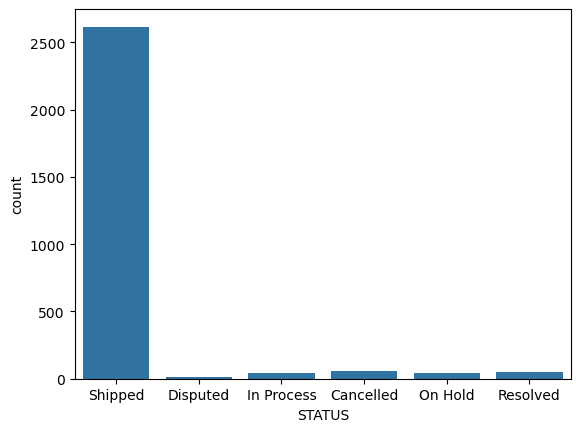

In [7]:
sns.countplot(data = df, x='STATUS')

<Axes: xlabel='SALES', ylabel='Count'>

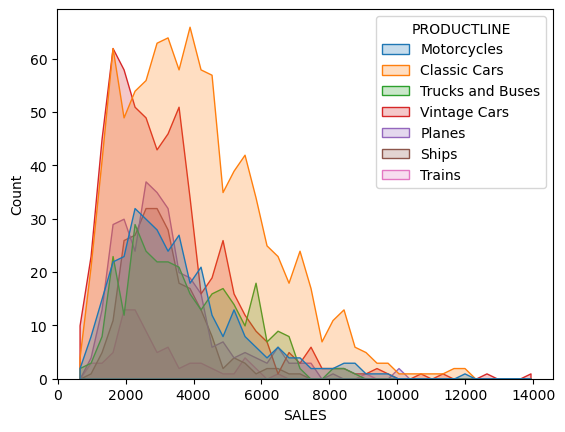

In [8]:
sns.histplot(x="SALES", hue="PRODUCTLINE", data =df, element="poly")

In [9]:
df["PRODUCTLINE"].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [10]:
df.drop_duplicates(inplace =True); df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [11]:
list_cat = df.select_dtypes(include=['object']).columns.tolist()
list_cat

['ORDERDATE',
 'STATUS',
 'PRODUCTLINE',
 'PRODUCTCODE',
 'CUSTOMERNAME',
 'PHONE',
 'ADDRESSLINE1',
 'ADDRESSLINE2',
 'CITY',
 'STATE',
 'POSTALCODE',
 'COUNTRY',
 'TERRITORY',
 'CONTACTLASTNAME',
 'CONTACTFIRSTNAME',
 'DEALSIZE']

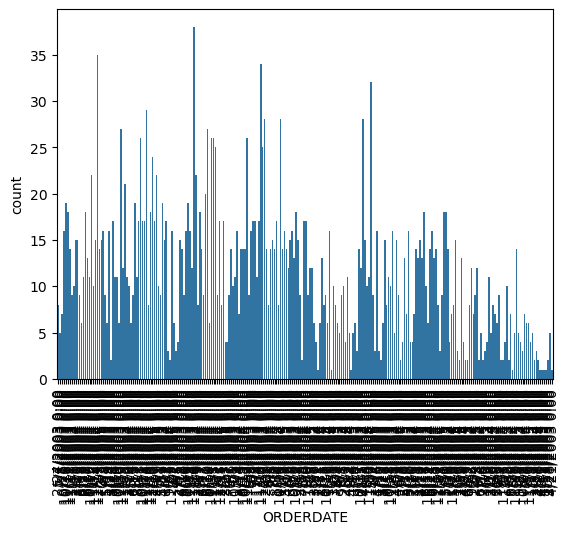

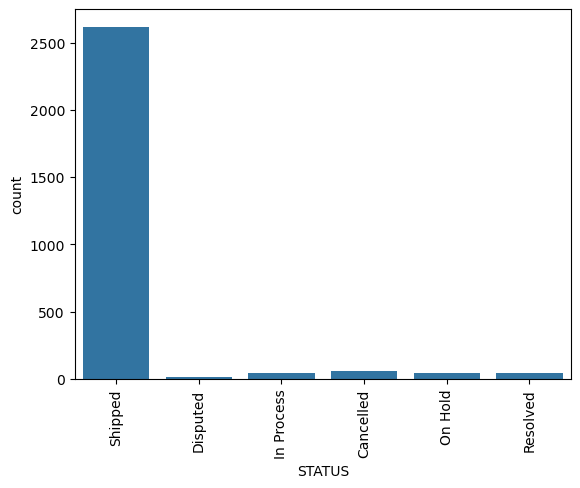

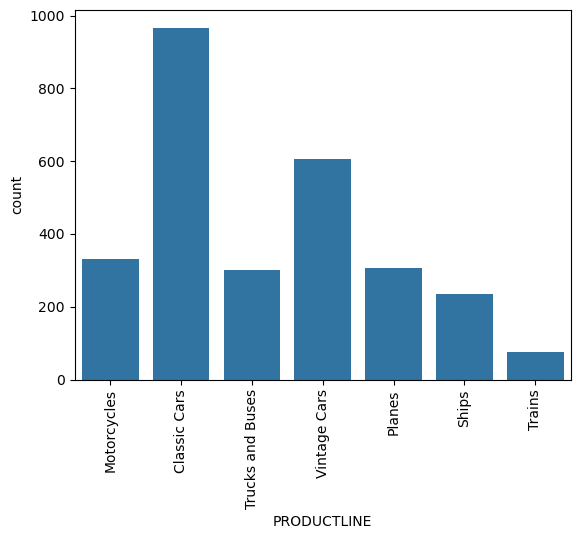

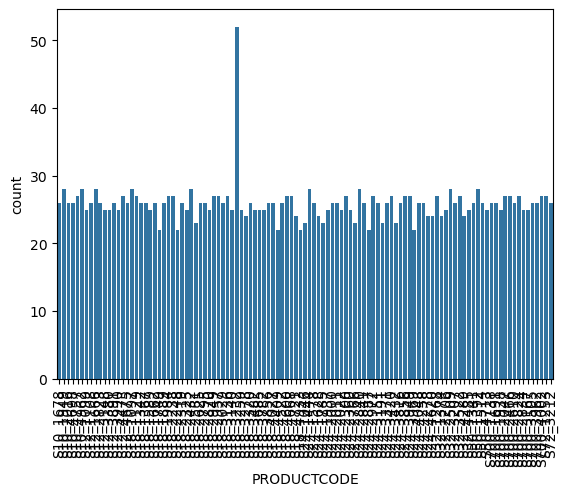

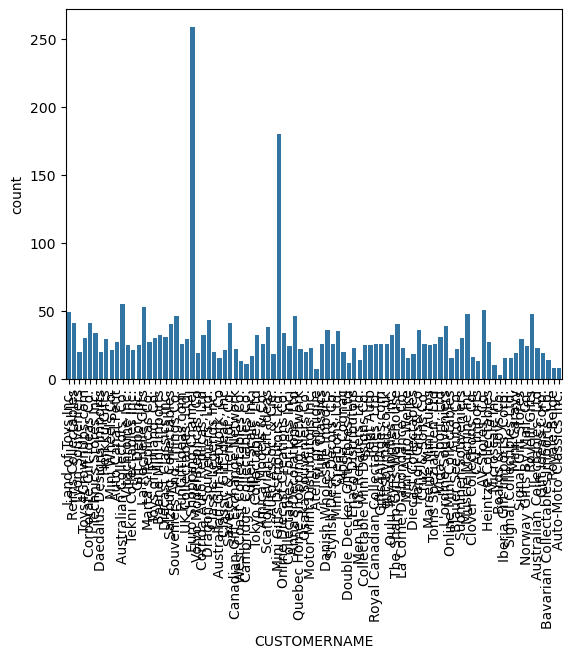

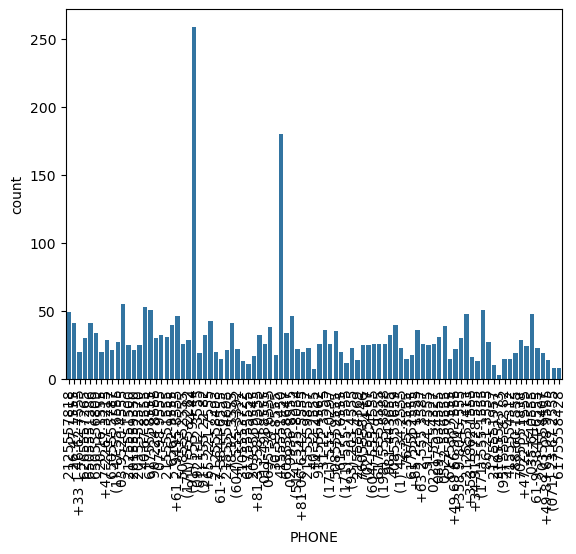

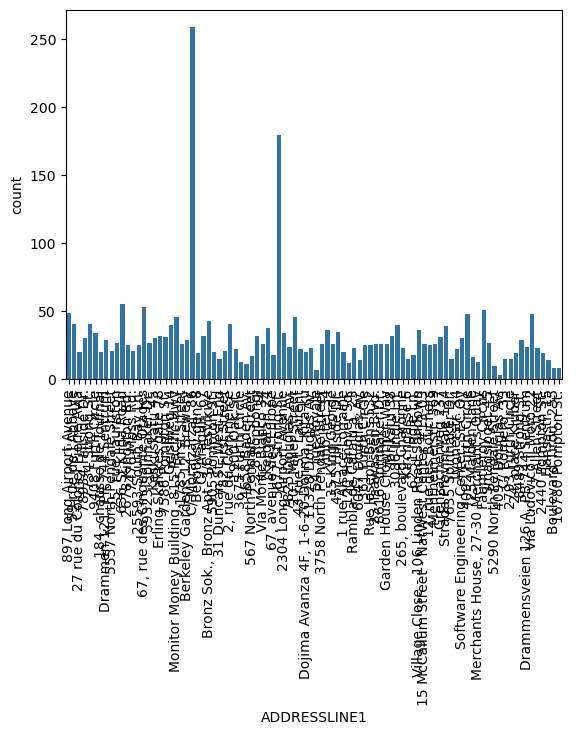

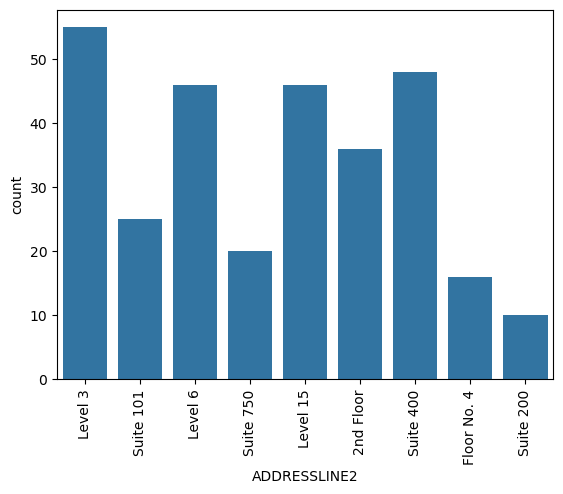

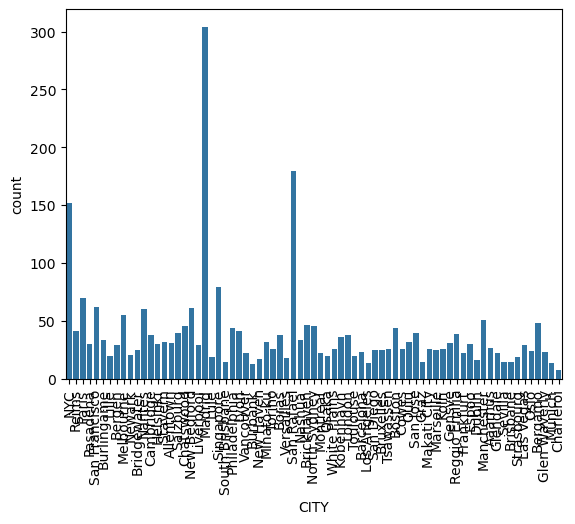

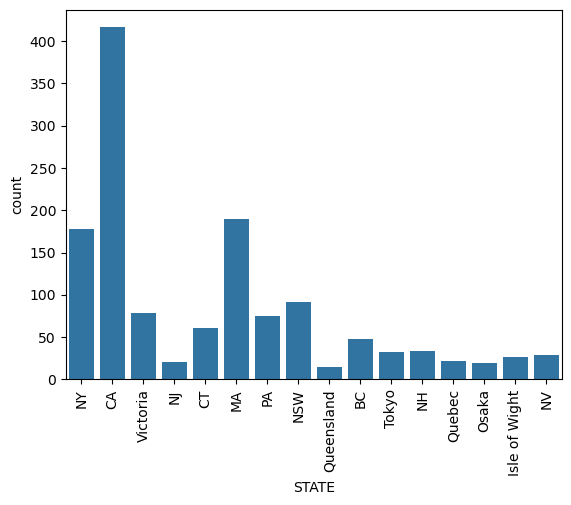

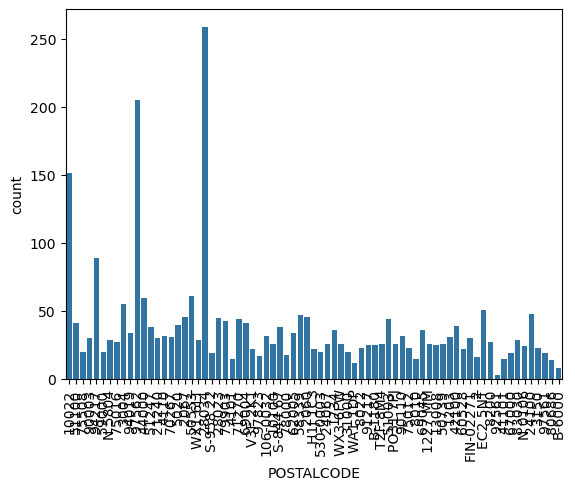

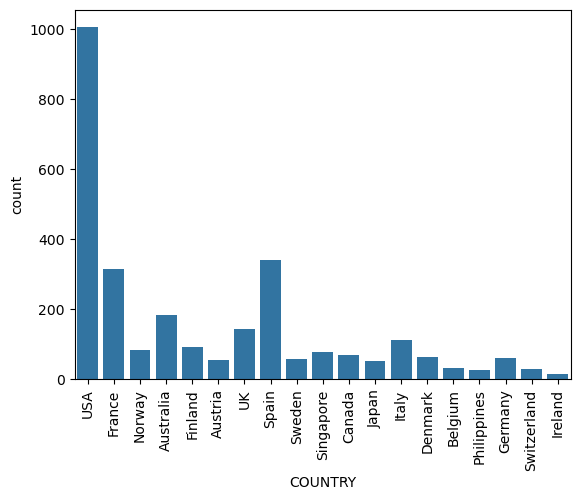

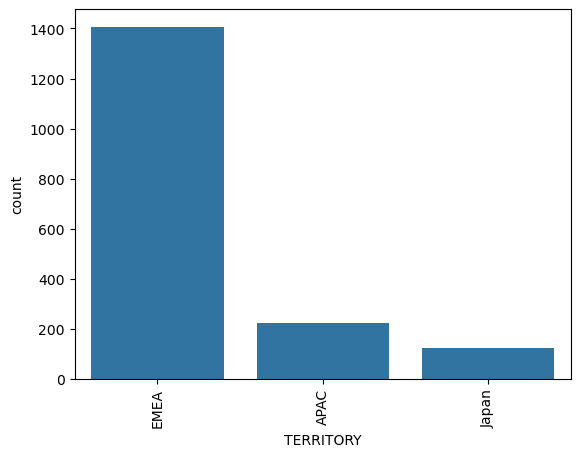

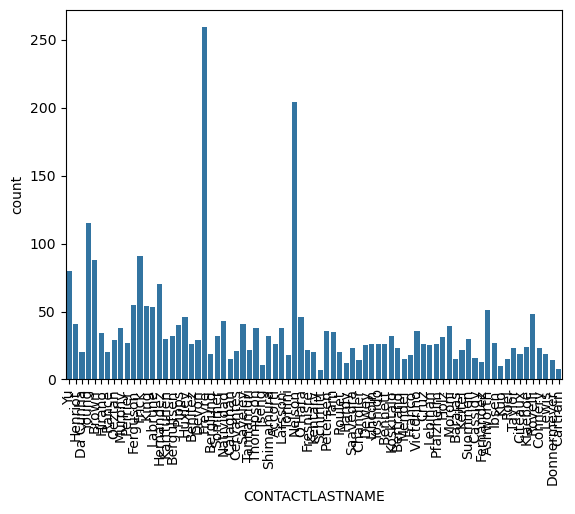

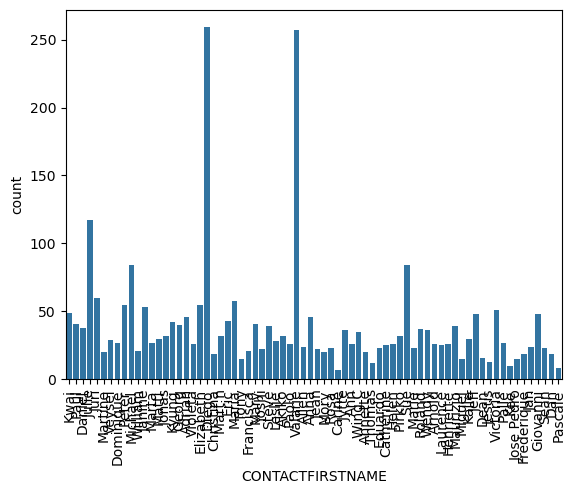

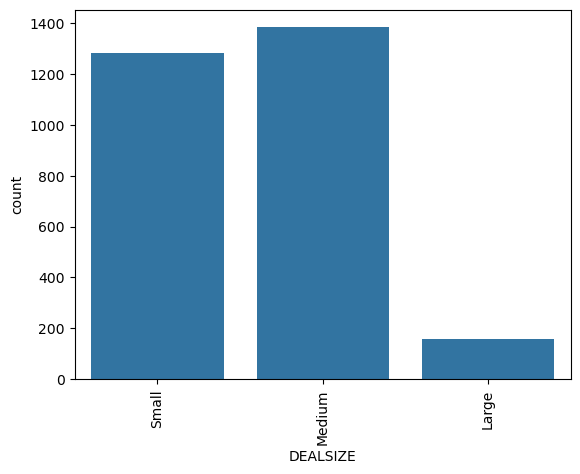

In [12]:
for i in list_cat:
    sns.countplot(data=df, x=i)
    plt.xticks(rotation=90)
    plt.show()

In [13]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for i in list_cat:
    df[i] = le.fit_transform(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   int32  
 6   STATUS            2823 non-null   int32  
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   int32  
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   int32  
 13  CUSTOMERNAME      2823 non-null   int32  
 14  PHONE             2823 non-null   int32  
 15  ADDRESSLINE1      2823 non-null   int32  
 16  ADDRESSLINE2      2823 non-null   int32  


In [14]:
df['SALES'] = df['SALES'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   int32  
 5   ORDERDATE         2823 non-null   int32  
 6   STATUS            2823 non-null   int32  
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   int32  
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   int32  
 13  CUSTOMERNAME      2823 non-null   int32  
 14  PHONE             2823 non-null   int32  
 15  ADDRESSLINE1      2823 non-null   int32  
 16  ADDRESSLINE2      2823 non-null   int32  


In [15]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,...,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.421537,116.949345,4.782501,2.717676,7.092455,2003.81509,...,48.956784,8.440312,38.094226,10.991144,33.423309,12.029401,1.725469,39.462983,36.546936,1.398512
std,92.085478,9.741443,20.174277,4.225841,1841.865754,73.108081,0.879416,1.203878,3.656633,0.69967,...,25.358148,1.799844,19.446076,6.137590,22.051492,6.169774,1.056893,21.511060,21.016560,0.592498
min,10100.000000,6.000000,26.880000,1.000000,482.000000,0.000000,0.000000,1.000000,1.000000,2003.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.000000,53.000000,5.000000,2.000000,4.000000,2003.00000,...,29.000000,9.000000,24.500000,4.000000,14.000000,6.000000,1.000000,25.000000,16.000000,1.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.000000,102.000000,5.000000,3.000000,8.000000,2004.00000,...,51.000000,9.000000,38.000000,16.000000,30.000000,14.000000,1.000000,39.000000,36.000000,1.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,182.000000,5.000000,4.000000,11.000000,2004.00000,...,68.000000,9.000000,55.000000,16.000000,54.000000,18.000000,3.000000,56.000000,57.000000,2.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.000000,251.000000,5.000000,4.000000,12.000000,2005.00000,...,91.000000,9.000000,72.000000,16.000000,73.000000,18.000000,3.000000,76.000000,71.000000,2.000000


In [16]:
x = df[['SALES', 'PRODUCTCODE']]
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

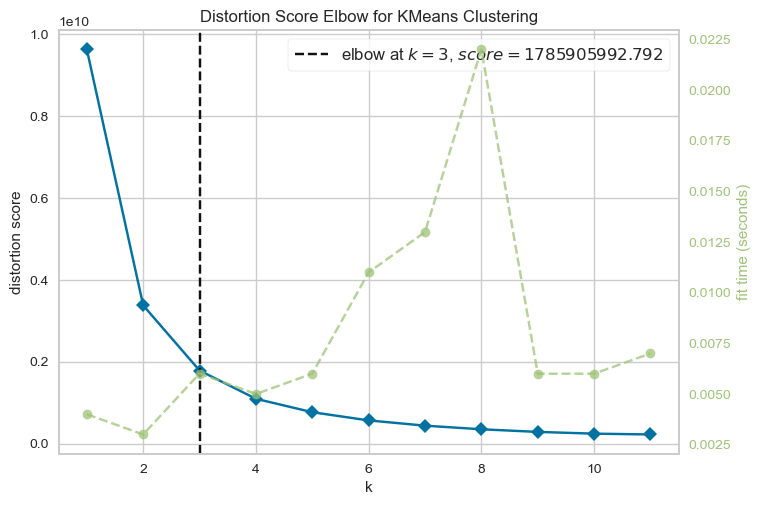

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
from sklearn.cluster import KMeans
km = KMeans(1)

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(x)
visualizer.show()

In [18]:
from sklearn.cluster import KMeans

# Assuming df is your processed dataframe with only numeric columns
x = df.values  

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(x)


KMeans(n_clusters=4, random_state=0)

In [19]:
kmeans.labels_

array([2, 2, 2, ..., 1, 0, 2])

In [20]:
kmeans.inertia_

1095371003.168447

In [21]:
kmeans.n_iter_

24

In [22]:
kmeans.cluster_centers_

array([[1.02589561e+04, 2.98844317e+01, 6.56257784e+01, 6.62846227e+00,
        1.88963706e+03, 1.18268386e+02, 4.79083095e+00, 2.72492837e+00,
        7.13276027e+00, 2.00381662e+03, 2.91690544e+00, 7.35272206e+01,
        6.33428844e+01, 4.50649475e+01, 4.35377268e+01, 4.84393505e+01,
        8.38204394e+00, 3.82483286e+01, 1.10105062e+01, 3.38490926e+01,
        1.18471824e+01, 1.70487106e+00, 3.92196753e+01, 3.67402101e+01,
        2.00000000e+00],
       [1.02575893e+04, 4.07607143e+01, 9.95566607e+01, 6.25892857e+00,
        5.30425179e+03, 1.15217857e+02, 4.81071429e+00, 2.73035714e+00,
        7.11964286e+00, 2.00380536e+03, 2.20000000e+00, 1.27142857e+02,
        4.08625000e+01, 4.63607143e+01, 4.23410714e+01, 4.94089286e+01,
        8.40535714e+00, 3.79785714e+01, 1.11339286e+01, 3.37017857e+01,
        1.22107143e+01, 1.72500000e+00, 3.91089286e+01, 3.64053571e+01,
        1.00000000e+00],
       [1.02563520e+04, 3.51268437e+01, 9.03024779e+01, 6.59685349e+00,
        3.4354

In [23]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 1047, 2: 1017, 1: 560, 3: 199})